# Corporación Favorita Time Series Forecasting:Cross‑Model Benchmarking & Comparative Analysis
*`ETS · Prophet · SARIMA · ARIMA — Unified Evaluation, Ranking & Visualization Suite`*

## 1️⃣ Notebook Overview

This notebook benchmarks four forecasting model families using saved experiment results.
It performs:
- Metric loading (JSON or MLflow)
- Unified comparison table
- Model ranking
- Forecast overlay comparison
- Error distribution analysis
- Statistical summaries
- Full visualization suite

All models are **not retrained** — only saved results are used.
  


## 2️⃣ Imports & configuration

### *2.1 configuration*

In [2]:
import os
import sys
# --- Setup ---
%load_ext autoreload
%autoreload 2
%matplotlib inline

bad_paths = [
    "/Users/guykaptue/my_work_spaces/machine learning",
    "/Users/guykaptue/my_work_spaces/machine learning/masterschool/time-series/retail_demand_analysis/src"
]
sys.path = [p for p in sys.path if os.path.abspath(p) not in bad_paths]

print("Clean sys.path:")

Clean sys.path:


In [3]:

from IPython.display import display
from pathlib import Path

import plotly.offline as pyo
pyo.init_notebook_mode(connected=True)

# ------------------------------------------------------------
# 1️⃣ Determine project root dynamically
# - Works even if notebook is in a subfolder of notebooks/
# ------------------------------------------------------------
cwd = os.getcwd()
print("Current working directory:", cwd)

# Project root = traveltide_project folder
# Assumes notebooks/ is directly under traveltide_project/
# Project root
project_root = os.path.abspath(os.path.join(cwd, "../.."))
print("Project root:", project_root)



## ------------------------------------------------------------
# 2️⃣ Add project root to sys.path for imports
# ------------------------------------------------------------
# Add project root to sys.path
if project_root not in sys.path:
    sys.path.insert(0, project_root)



print("Project root added to sys.path:", project_root)

print(sys.path)  # Ensure /traveltide_project is included

# Check if src exists
print(os.path.exists(os.path.join(project_root, "src")))

Current working directory: /Users/guykaptue/my_work_spaces/machine learning/masterschool/time-series/retail_demand_analysis/notebooks/week_2
Project root: /Users/guykaptue/my_work_spaces/machine learning/masterschool/time-series/retail_demand_analysis
Project root added to sys.path: /Users/guykaptue/my_work_spaces/machine learning/masterschool/time-series/retail_demand_analysis
['/Users/guykaptue/my_work_spaces/machine learning/masterschool/time-series/retail_demand_analysis', '/opt/anaconda3/envs/retail_env/lib/python311.zip', '/opt/anaconda3/envs/retail_env/lib/python3.11', '/opt/anaconda3/envs/retail_env/lib/python3.11/lib-dynload', '', '/opt/anaconda3/envs/retail_env/lib/python3.11/site-packages']
True


In [4]:
# Verify that src is importable
try:
    import src
    print("✅ src module found at:", src.__file__)
except ModuleNotFoundError:
    print("❌ src module not found. Check your sys.path!")


📌 Plot 7 — 120-Day Linear Trend
✅ src module found at: /Users/guykaptue/my_work_spaces/machine learning/masterschool/time-series/retail_demand_analysis/src/__init__.py


### *2.2 Core imports*

In [5]:
# ================================================================
# 📦 2.2. Import Libraries and Environment Setup
# This cell loads all required libraries and configures the notebook
# environment for professional forecasting workflows.
# ================================================================

import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from src import(
    DataLoader,
   ModelComparison,
   ModelComparisonVisualizer
)


warnings.filterwarnings("ignore")
pd.options.display.max_columns = None
pd.options.display.max_rows = 100

plt.style.use("seaborn-v0_8")
sns.set_palette("husl")

print("✅ Environment initialized successfully")
print(f"Pandas: {pd.__version__}, NumPy: {np.__version__}")



✅ Environment initialized successfully
Pandas: 2.3.3, NumPy: 2.3.5


### *2.3 Configuration Setup*

Set the week, store, and item identifiers.
Choose backend: JSON, MLflow, or both.

In [6]:
# ================================================================
# ⚙️ 2.4 ARIMA Configuration Setup
# Defines all parameters for ARIMA data loading, model configuration,
# experiment tracking, and advanced options for Personnel's demand forecasting.
# ================================================================

# Data Configuration
TABLE_NAME = "train_cleaned.csv"
FOLDER_NAME = "cleaned"
WEEK = 2
PREVIOUS_WEEK = 1

BACKEND = "both" # "json", "mlflow", or "both" 
# Pipeline Configuration
USE_MLFLOW = True
USE_CACHE = True
VERBOSE = True

# Series Selection for Personnel Germany Market Analysis
STORE_IDS = [24]
ITEM_IDS = [105577]
MAX_DATE = None

# ARIMA-Specific Parameters
ARIMA_ORDER = (2, 1, 2)  # Default ARIMA(p,d,q) order - will be tuned during model selection
SEASONAL_ORDER = (1, 1, 1, 7)  # Weekly seasonality for retail data
TEST_SIZE = 0.2  # 20% of data for testing
STATIONARITY_THRESHOLD = 0.05  # p-value threshold for ADF test

# Experiment Configuration
CV_SPLIT_RATIOS = [0.70, 0.75, 0.80, 0.85, 0.90]
HANDLE_OUTLIERS = True  # Enable outlier handling for ARIMA
PERFORM_CV = True  # Enable cross-validation for robust evaluation

# Multi-series experiment configuration for Personnel's multiple locations
MULTI_SERIES = [
    ([24], [105577]),  # Store 24, Item 105577
    ([24], [105574]),  # Store 24, Item 105574
    ([26], [105577]),  # Store 26, Item 105577
    ([26], [105575]),  # Store 26, Item 105575
    ([27], [105577]),  # Store 27, Item 105577
    ([51], [105577]),  # Store 51, Item 105577
]

# Column Mapping for Personnel's Data Structure
COLUMN_MAPPING = {
    "date_col": "date",
    "store_col": "store_nbr",
    "item_col": "item_nbr",
    "sales_col": "unit_sales",
    "promo_col": "onpromotion"
}

print(" ARIMA configuration loaded for Personnel Germany Market Analysis")


 ARIMA configuration loaded for Personnel Germany Market Analysis


## **3️⃣ LInitialize Model Comparison Engine**

This object loads:
- ETS results
- Prophet results
- SARIMA results
- ARIMA results

It does **not** retrain models.


In [7]:
comparison = ModelComparison(
    week=WEEK,
    store_ids=STORE_IDS,
    item_ids=ITEM_IDS,
    backend=BACKEND,
    use_mlflow=USE_MLFLOW,
    verbose=VERBOSE
)




  MODEL COMPARISON INITIALIZED

Week: 2
Store IDs: [24]
Item IDs: [105577]
Backend: both
MLflow enabled: True
Results path: /Users/guykaptue/my_work_spaces/machine learning/masterschool/time-series/retail_demand_analysis/reports/results/week_2/comparison

📁 Model Paths Configured:
  • PROPHET   : /Users/guykaptue/my_work_spaces/machine learning/masterschool/time-series/retail_demand_analysis/reports/results/week_2/prophet
  • SARIMA    : /Users/guykaptue/my_work_spaces/machine learning/masterschool/time-series/retail_demand_analysis/reports/results/week_2/sarima
  • ETS       : /Users/guykaptue/my_work_spaces/machine learning/masterschool/time-series/retail_demand_analysis/reports/results/week_2/ets
  • ARIMA     : /Users/guykaptue/my_work_spaces/machine learning/masterschool/time-series/retail_demand_analysis/reports/results/week_2/arima



## 4️⃣ Check Available Model Outputs

This step verifies which models have:
- Metrics JSON
- Forecast CSV
- Saved model artifacts

Useful for debugging missing results.


In [8]:
availability = comparison.check_available_data()
availability




────────────────────────────────────────────────────────────────────────────────
▶ Checking Available Data
────────────────────────────────────────────────────────────────────────────────
✅ PROPHET   : metrics(3), forecast(1), model(1)
✅ SARIMA    : metrics(3), forecast(1), model(3)
✅ ETS       : metrics(3), forecast(1), model(1)
✅ ARIMA     : metrics(2), forecast(1), model(5)



{'prophet': {'results_path': '/Users/guykaptue/my_work_spaces/machine learning/masterschool/time-series/retail_demand_analysis/reports/results/week_2/prophet',
  'has_metrics': True,
  'metrics_files': ['data_split_summary.json',
   'component_metrics.json',
   'evaluation_metrics.json'],
  'has_forecast': True,
  'forecast_files': ['forecast_vs_actual.csv'],
  'has_model': True,
  'model_files': ['prophet_model.pkl']},
 'sarima': {'results_path': '/Users/guykaptue/my_work_spaces/machine learning/masterschool/time-series/retail_demand_analysis/reports/results/week_2/sarima',
  'has_metrics': True,
  'metrics_files': ['data_split_summary.json',
   'training_summary_stats.json',
   'evaluation_metrics.json'],
  'has_forecast': True,
  'forecast_files': ['forecast_vs_actual.csv'],
  'has_model': True,
  'model_files': ['sarima_111_1117.pkl',
   'sarima_301_0117.pkl',
   'sarima_300_0117.pkl']},
 'ets': {'results_path': '/Users/guykaptue/my_work_spaces/machine learning/masterschool/time-se

## 5️⃣ Load Model Metrics

Loads evaluation metrics from:
- JSON files
- MLflow (if enabled)


In [9]:
metrics = comparison.load_metrics()
metrics



────────────────────────────────────────────────────────────────────────────────
▶ Loading Model Metrics
────────────────────────────────────────────────────────────────────────────────
  ✓ Found: evaluation_metrics.json
✅ Loaded metrics for ETS
  ✓ Found: evaluation_metrics.json
✅ Loaded metrics for PROPHET
  ✓ Found: evaluation_metrics.json
✅ Loaded metrics for SARIMA
  ✓ Found: evaluation_metrics.json
✅ Loaded metrics for ARIMA

✅ Successfully loaded 4 model(s): ETS, PROPHET, SARIMA, ARIMA


{'ets': ModelResult(model_type='ets', mae=1.541363313394357, rmse=2.2253291923825342, mape=5625868094.745972, smape=103.2799590749758, mase=0.7154813143288241, r2=0.003391797352873538, aic=None, coverage=None, train_size=None, test_size=None, extra={}),
 'prophet': ModelResult(model_type='prophet', mae=1.3830566598376384, rmse=1.5937930585835713, mape=801208857579.783, smape=111.68251645740376, mase=1.0266301637239794, r2=-0.20502399156932105, aic=None, coverage=97.33727810650888, train_size=None, test_size=None, extra={'mse': 2.5401763135891753, 'rmsle': 0.7472464446113088, 'adj_r2': -0.20861037249661063, 'mdape': 104.5129438560044, 'wape': 108.96810047203095, 'rmsse': 0.8315465366661926, 'rae': 393.2753255660693, 'rse': 1.2050239915691519, 'mfe': -0.6665403914452435, 'mpe': -801208857560.1207, 'tracking_signal': -0.4819328164583637, 'theil_u': 0.8315465366661926, 'interval_width': 5.66292589364049, 'interval_score': 6.44446087435586, 'winkler_score': 6.44446087435586, 'acf1': 0.16356

## 6️⃣ Build Comparison Table

Creates a unified DataFrame with:
- MAE, RMSE, MAPE, SMAPE, MASE, R²
- AIC (if available)
- Coverage (Prophet)
- Train/Test sizes


In [10]:
comparison_df = comparison.build_comparison_table()
comparison_df



────────────────────────────────────────────────────────────────────────────────
▶ Building Comparison Table
────────────────────────────────────────────────────────────────────────────────
✅ Built comparison table with 4 models

✅ Comparison table built with 4 models

Comparison Table:
model_type      mae     rmse         mape      smape     mase        r2         aic  coverage train_size test_size      mse    rmsle   adj_r2      mdape     wape    rmsse        rae      rse      mfe           mpe  tracking_signal  theil_u  interval_width  interval_score  winkler_score     acf1  ljungbox_statistic  ljungbox_pvalue  shapiro_statistic  shapiro_pvalue  jarque_bera_statistic  jarque_bera_pvalue  durbin_watson  residuals_mean  residuals_std  residuals_min  residuals_max  residuals_skewness  residuals_kurtosis  directional_accuracy  pt_statistic  pt_pvalue
       ETS 1.541363 2.225329 5.625868e+09 103.279959 0.715481  0.003392         NaN       NaN       None      None      NaN      NaN     

,model_type,mae,rmse,mape,smape,mase,r2,aic,coverage,train_size,test_size,mse,rmsle,adj_r2,mdape,wape,rmsse,rae,rse,mfe,mpe,tracking_signal,theil_u,interval_width,interval_score,winkler_score,acf1,ljungbox_statistic,ljungbox_pvalue,shapiro_statistic,shapiro_pvalue,jarque_bera_statistic,jarque_bera_pvalue,durbin_watson,residuals_mean,residuals_std,residuals_min,residuals_max,residuals_skewness,residuals_kurtosis,directional_accuracy,pt_statistic,pt_pvalue
0,ETS,1.541363,2.225329,5.625868e+09,103.279959,0.715481,0.003392,NaN,NaN,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,PROPHET,1.383057,1.593793,8.012089e+11,111.682516,1.026630,-0.205024,NaN,97.337278,None,None,2.540176,0.747246,-0.20861,104.512944,108.9681,0.831547,393.275326,1.205024,-0.66654,-8.012089e+11,-0.481933,0.831547,5.662926,6.444461,6.444461,0.163562,30.279923,0.000771,0.910399,2.750994e-13,67.792549,1.901232e-15,1.379774,-0.66654,1.447722,-2.66529,5.084965,1.041346,0.689976,37.982196,-4.412351,0.00001
2,SARIMA,1.324057,1.910897,2.208373e+11,NaN,NaN,-0.061961,0.000000,NaN,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ARIMA,1.330780,1.977513,2.592326e+11,NaN,NaN,-0.137294,1408.561489,NaN,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 7️⃣ Compute Model Rankings

Ranks models per metric:
- Lower-is-better metrics ranked ascending
- Higher-is-better metrics ranked descending


In [11]:
rankings_df = comparison.calculate_rankings()
rankings_df



────────────────────────────────────────────────────────────────────────────────
▶ Computing Model Rankings
────────────────────────────────────────────────────────────────────────────────
✅ Calculated rankings for 6 metrics

✅ Rankings calculated for 6 metrics

Model Rankings:
   metric   model         value  rank
      MAE  SARIMA  1.324057e+00     1
      MAE   ARIMA  1.330780e+00     2
      MAE PROPHET  1.383057e+00     3
      MAE     ETS  1.541363e+00     4
     RMSE PROPHET  1.593793e+00     1
     RMSE  SARIMA  1.910897e+00     2
     RMSE   ARIMA  1.977513e+00     3
     RMSE     ETS  2.225329e+00     4
 MAPE (%)     ETS  5.625868e+09     1
 MAPE (%)  SARIMA  2.208373e+11     2
 MAPE (%)   ARIMA  2.592326e+11     3
 MAPE (%) PROPHET  8.012089e+11     4
SMAPE (%)     ETS  1.032800e+02     1
SMAPE (%) PROPHET  1.116825e+02     2
     MASE     ETS  7.154813e-01     1
     MASE PROPHET  1.026630e+00     2
       R²     ETS  3.391797e-03     1
       R²  SARIMA -6.196124e-02     

,metric,model,value,rank
0,MAE,SARIMA,1.324057e+00,1
1,MAE,ARIMA,1.330780e+00,2
2,MAE,PROPHET,1.383057e+00,3
3,MAE,ETS,1.541363e+00,4
4,RMSE,PROPHET,1.593793e+00,1
5,RMSE,SARIMA,1.910897e+00,2
6,RMSE,ARIMA,1.977513e+00,3
7,RMSE,ETS,2.225329e+00,4
8,MAPE (%),ETS,5.625868e+09,1
9,MAPE (%),SARIMA,2.208373e+11,2


## 8️⃣ Load Forecast vs Actual Data

Loads forecast overlays for:
- ETS
- Prophet
- SARIMA
- ARIMA

Used for forecast comparison and error analysis.


In [12]:
forecast_data = comparison.load_forecasts()
forecast_data



────────────────────────────────────────────────────────────────────────────────
▶ Loading Forecast Data
────────────────────────────────────────────────────────────────────────────────
  ✓ Loaded forecast for ETS (338 rows)
  ✓ Loaded forecast for PROPHET (338 rows)
  ✓ Loaded forecast for SARIMA (91 rows)
  ✓ Loaded forecast for ARIMA (91 rows)

✅ Loaded forecasts for 4 model(s)
  • ETS: 338 rows, 2016-09-12 00:00:00 to 2017-08-15 00:00:00
  • PROPHET: 338 rows, 2016-09-12 00:00:00 to 2017-08-15 00:00:00
  • SARIMA: 91 rows, 2014-01-01 00:00:00 to 2014-04-01 00:00:00
  • ARIMA: 91 rows, 2013-12-31 00:00:00 to 2014-03-31 00:00:00


{'ets':      Unnamed: 0       date  forecast  actual     error  abs_error  \
 0             0 2016-09-12  1.671243     3.0  1.328757   1.328757   
 1             1 2016-09-13  1.733581     0.0 -1.733581   1.733581   
 2             2 2016-09-14  2.309814     0.0 -2.309814   2.309814   
 3             3 2016-09-15  1.330365     1.0 -0.330365   0.330365   
 4             4 2016-09-16  1.620420     2.0  0.379580   0.379580   
 ..          ...        ...       ...     ...       ...        ...   
 333         333 2017-08-11  1.345823     0.0 -1.345823   1.345823   
 334         334 2017-08-12  1.656870     0.0 -1.656870   1.656870   
 335         335 2017-08-13  2.200787     3.0  0.799213   0.799213   
 336         336 2017-08-14  1.390804     0.0 -1.390804   1.390804   
 337         337 2017-08-15  1.453142     1.0 -0.453142   0.453142   
 
         pct_error  
 0    4.429189e+01  
 1   -1.733581e+10  
 2   -2.309814e+10  
 3   -3.303646e+01  
 4    1.897902e+01  
 ..            ...  
 333

## 9️⃣ Initialize Visualization Suite

All plots are saved to:
`comparison_viz/week_X/`


In [13]:
viz = ModelComparisonVisualizer()


## 🔟 Generate Full Visualization Suite

Includes:
- Metrics comparison
- Radar chart
- Heatmap
- Rankings
- Metric distributions
- Forecast overlay
- Error analysis
- Statistical summary


### *`10.1 Notebook Section: Individual Plots`*

#### **10.1.1 Metrics Comparison Plot**

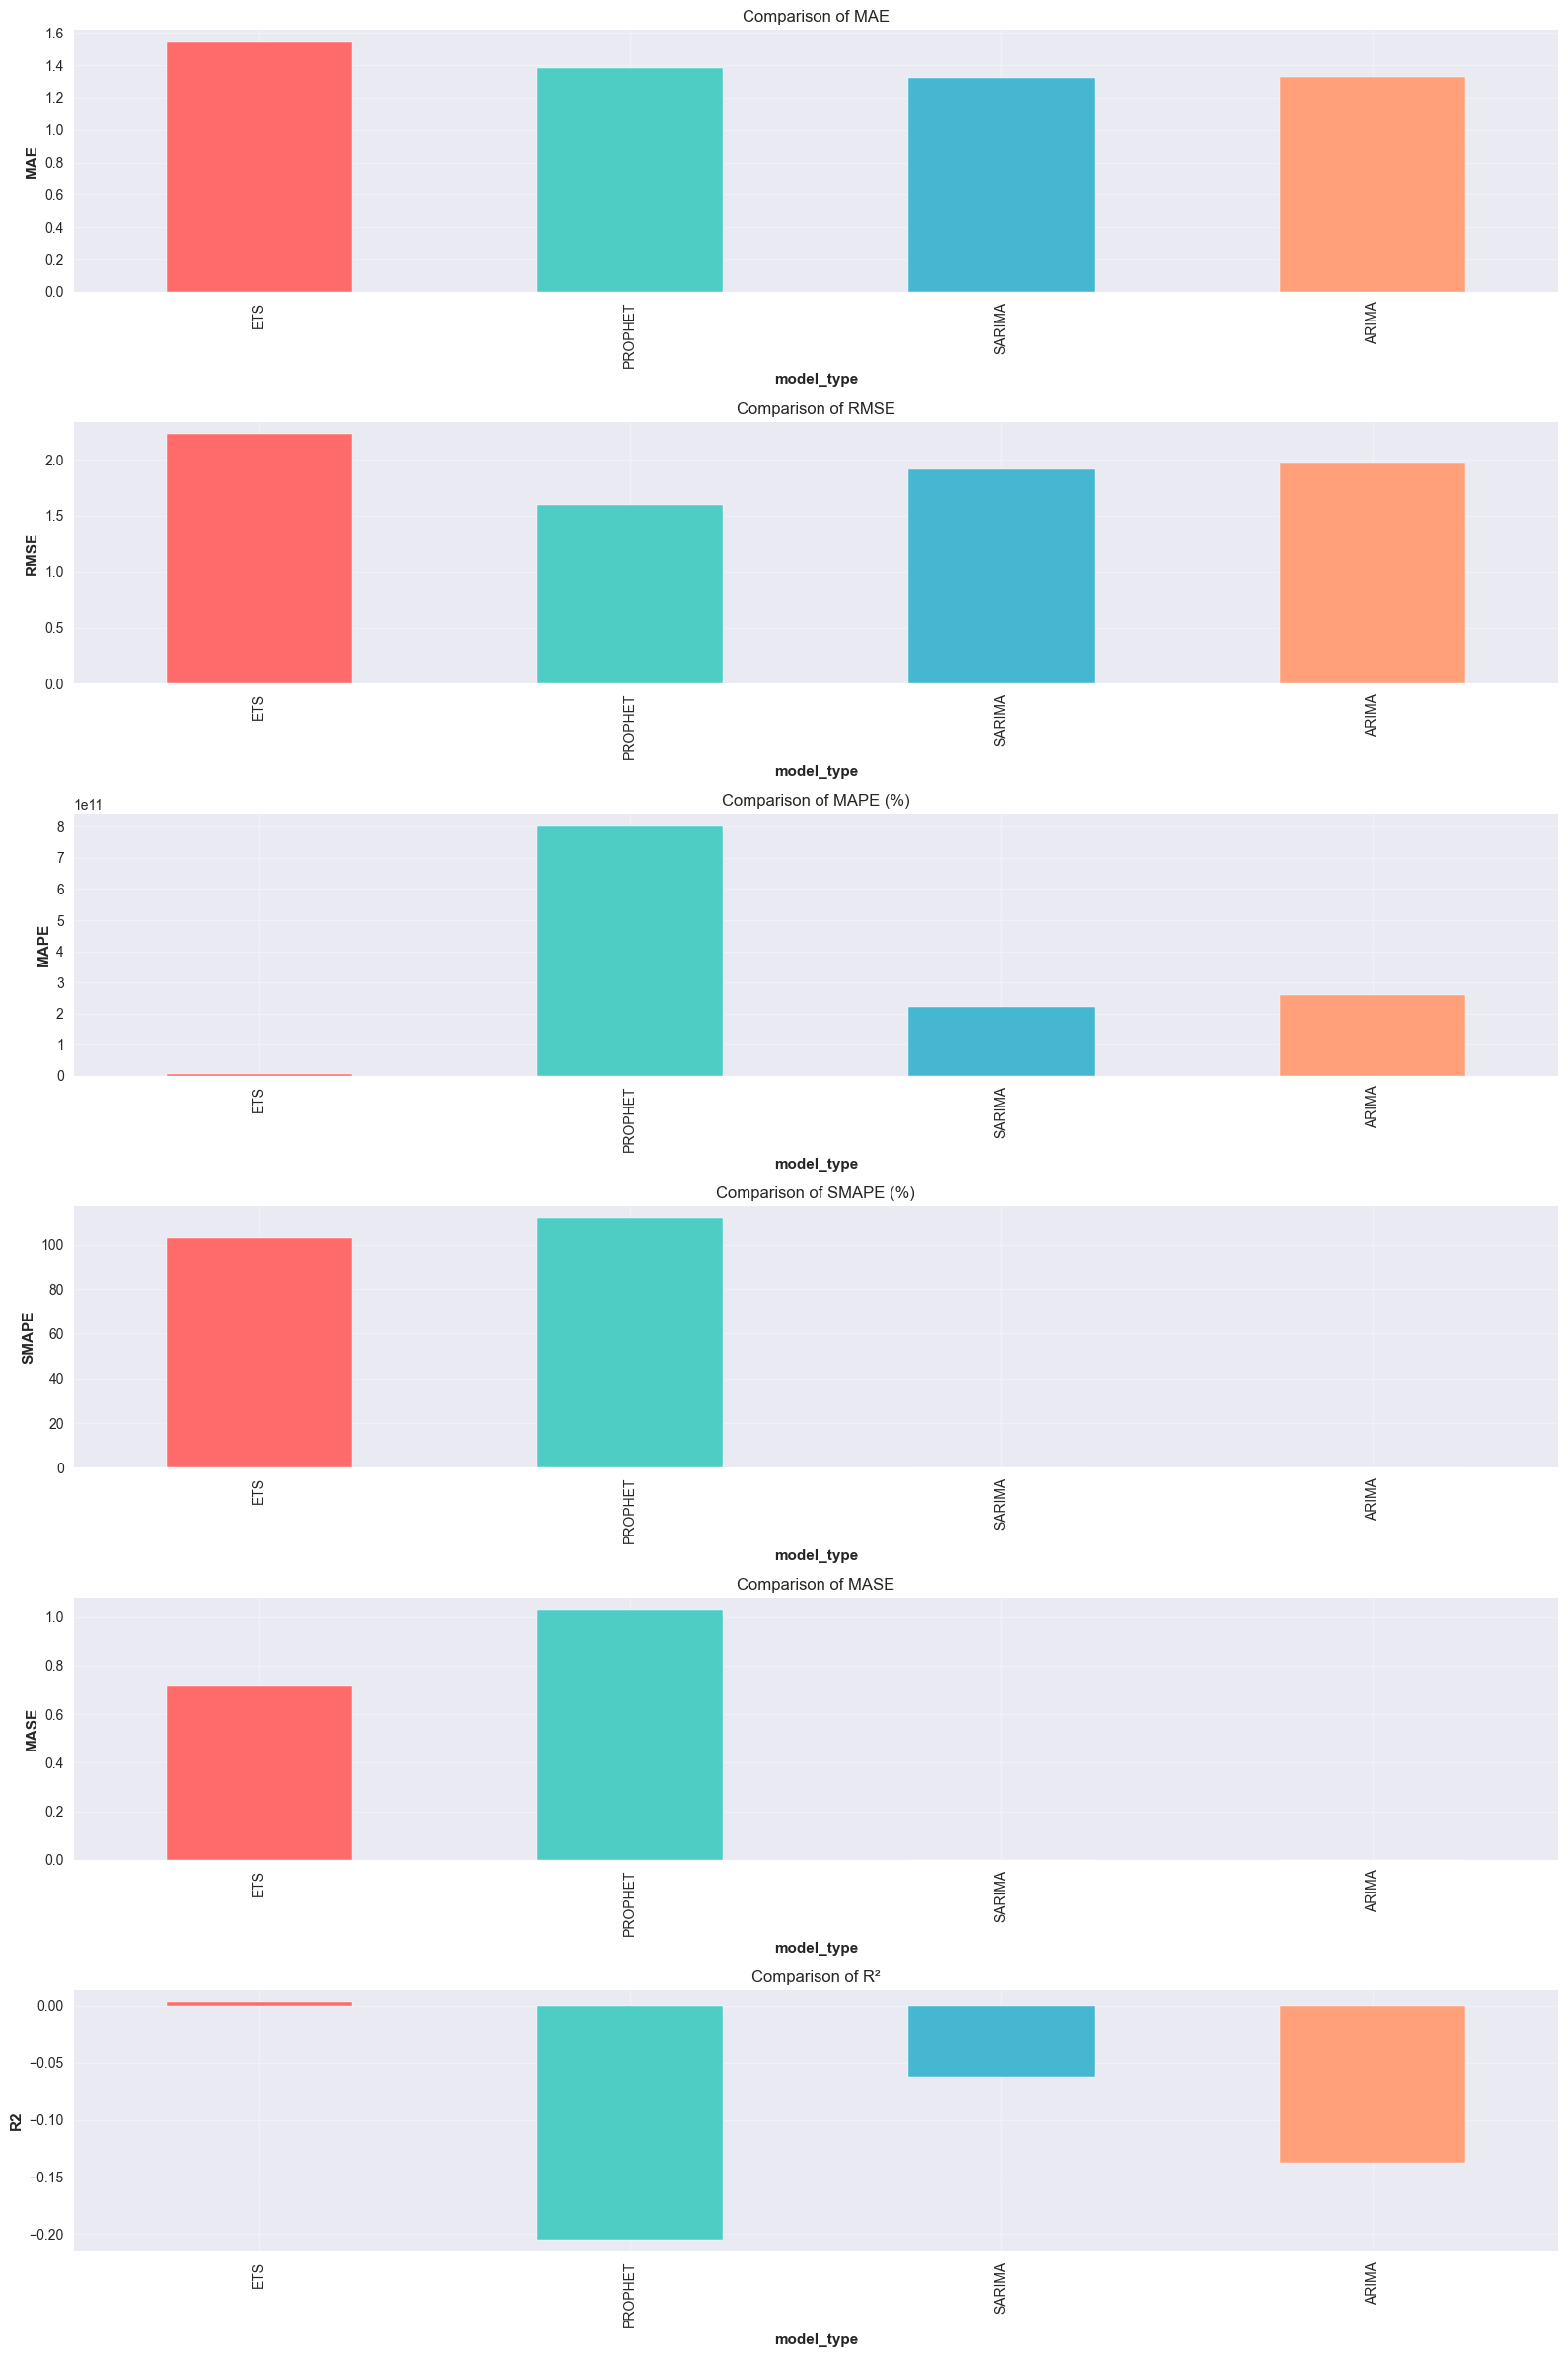

In [14]:
viz.plot_metrics_comparison(comparison_df)


#### **10.1.2 Radar Chart**

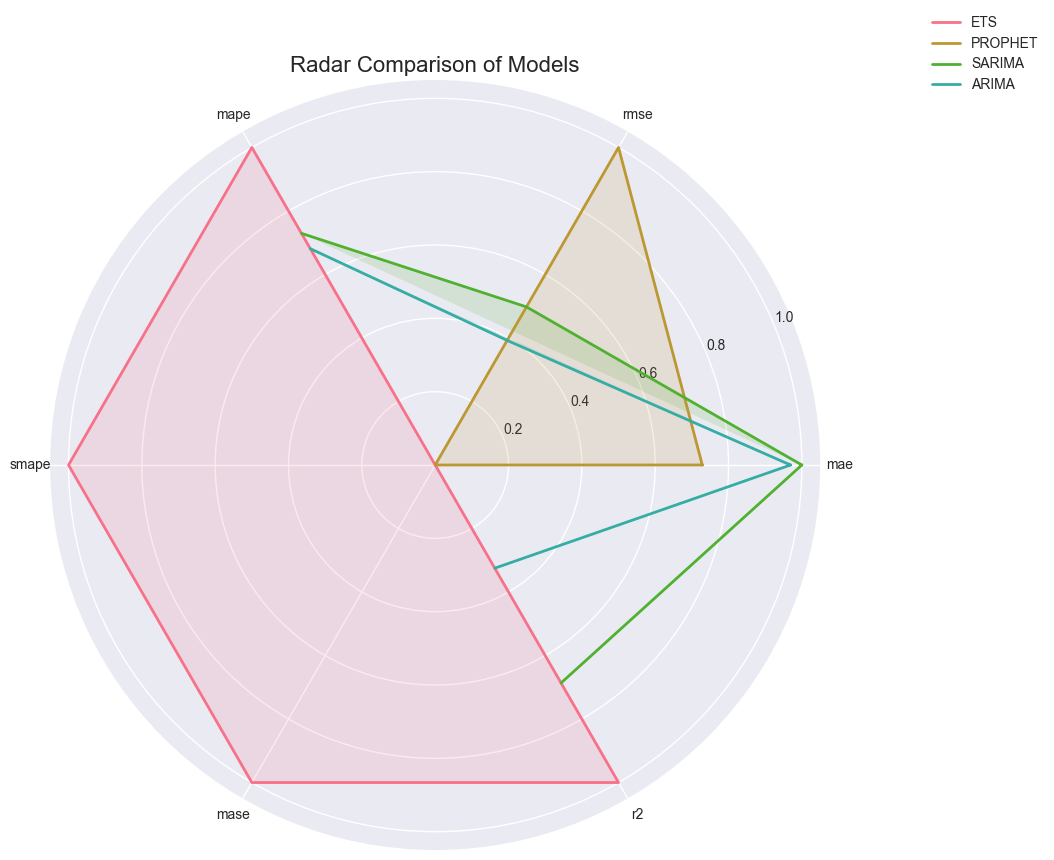

In [15]:
viz.plot_radar_comparison(comparison_df)


#### **10.1.3 Metrics Heatmap**

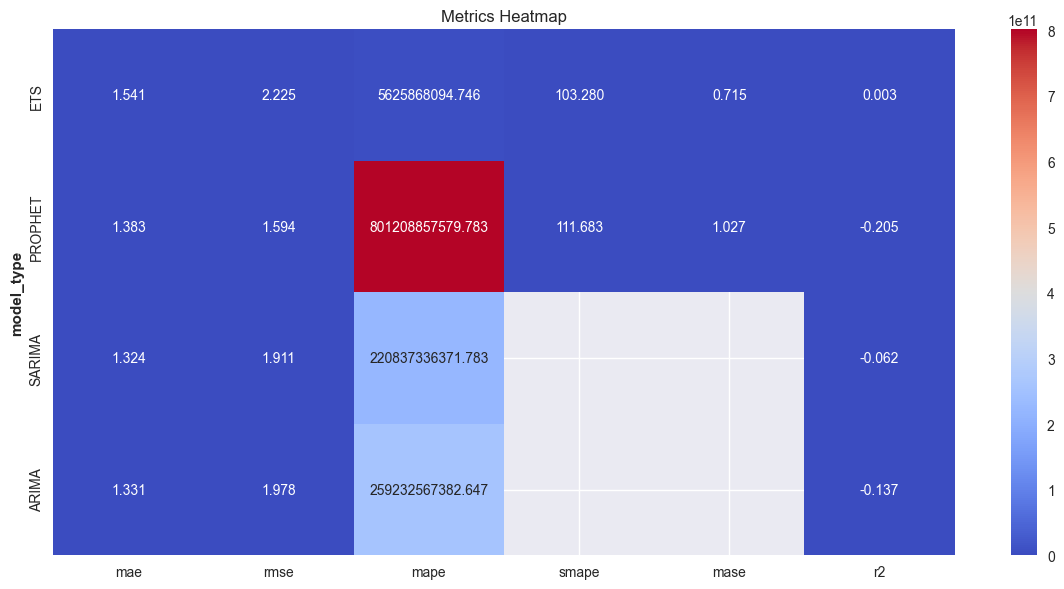

In [16]:
viz.plot_metrics_heatmap(comparison_df)


#### **10.1.4 Rankings Plot**

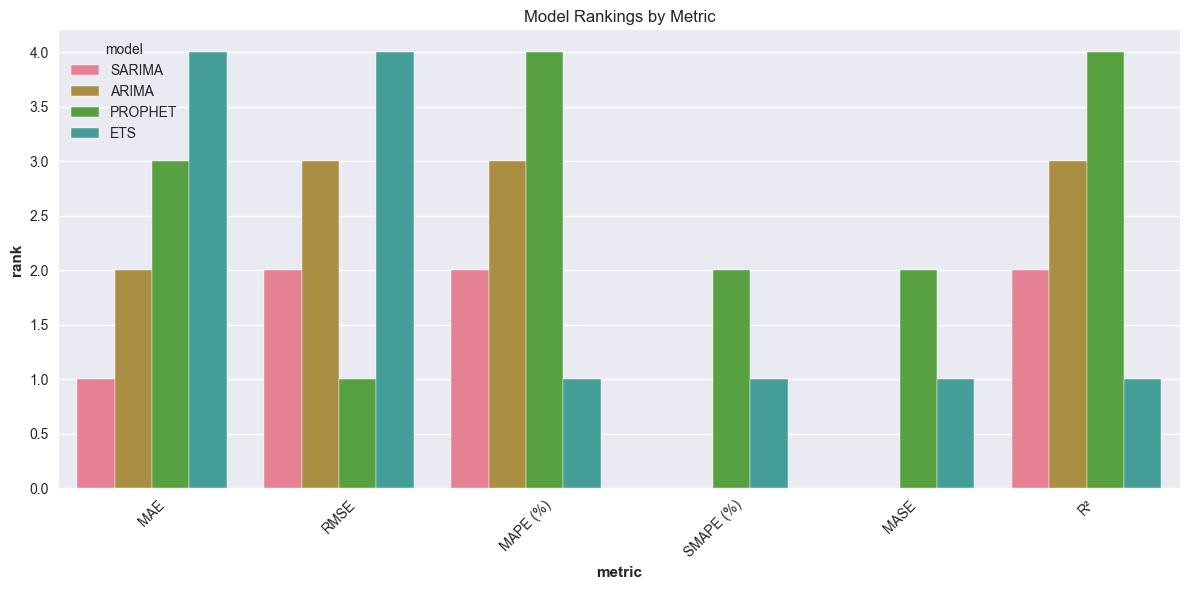

In [17]:
viz.plot_rankings(rankings_df)


#### **10.1.55 Metric Distributions**

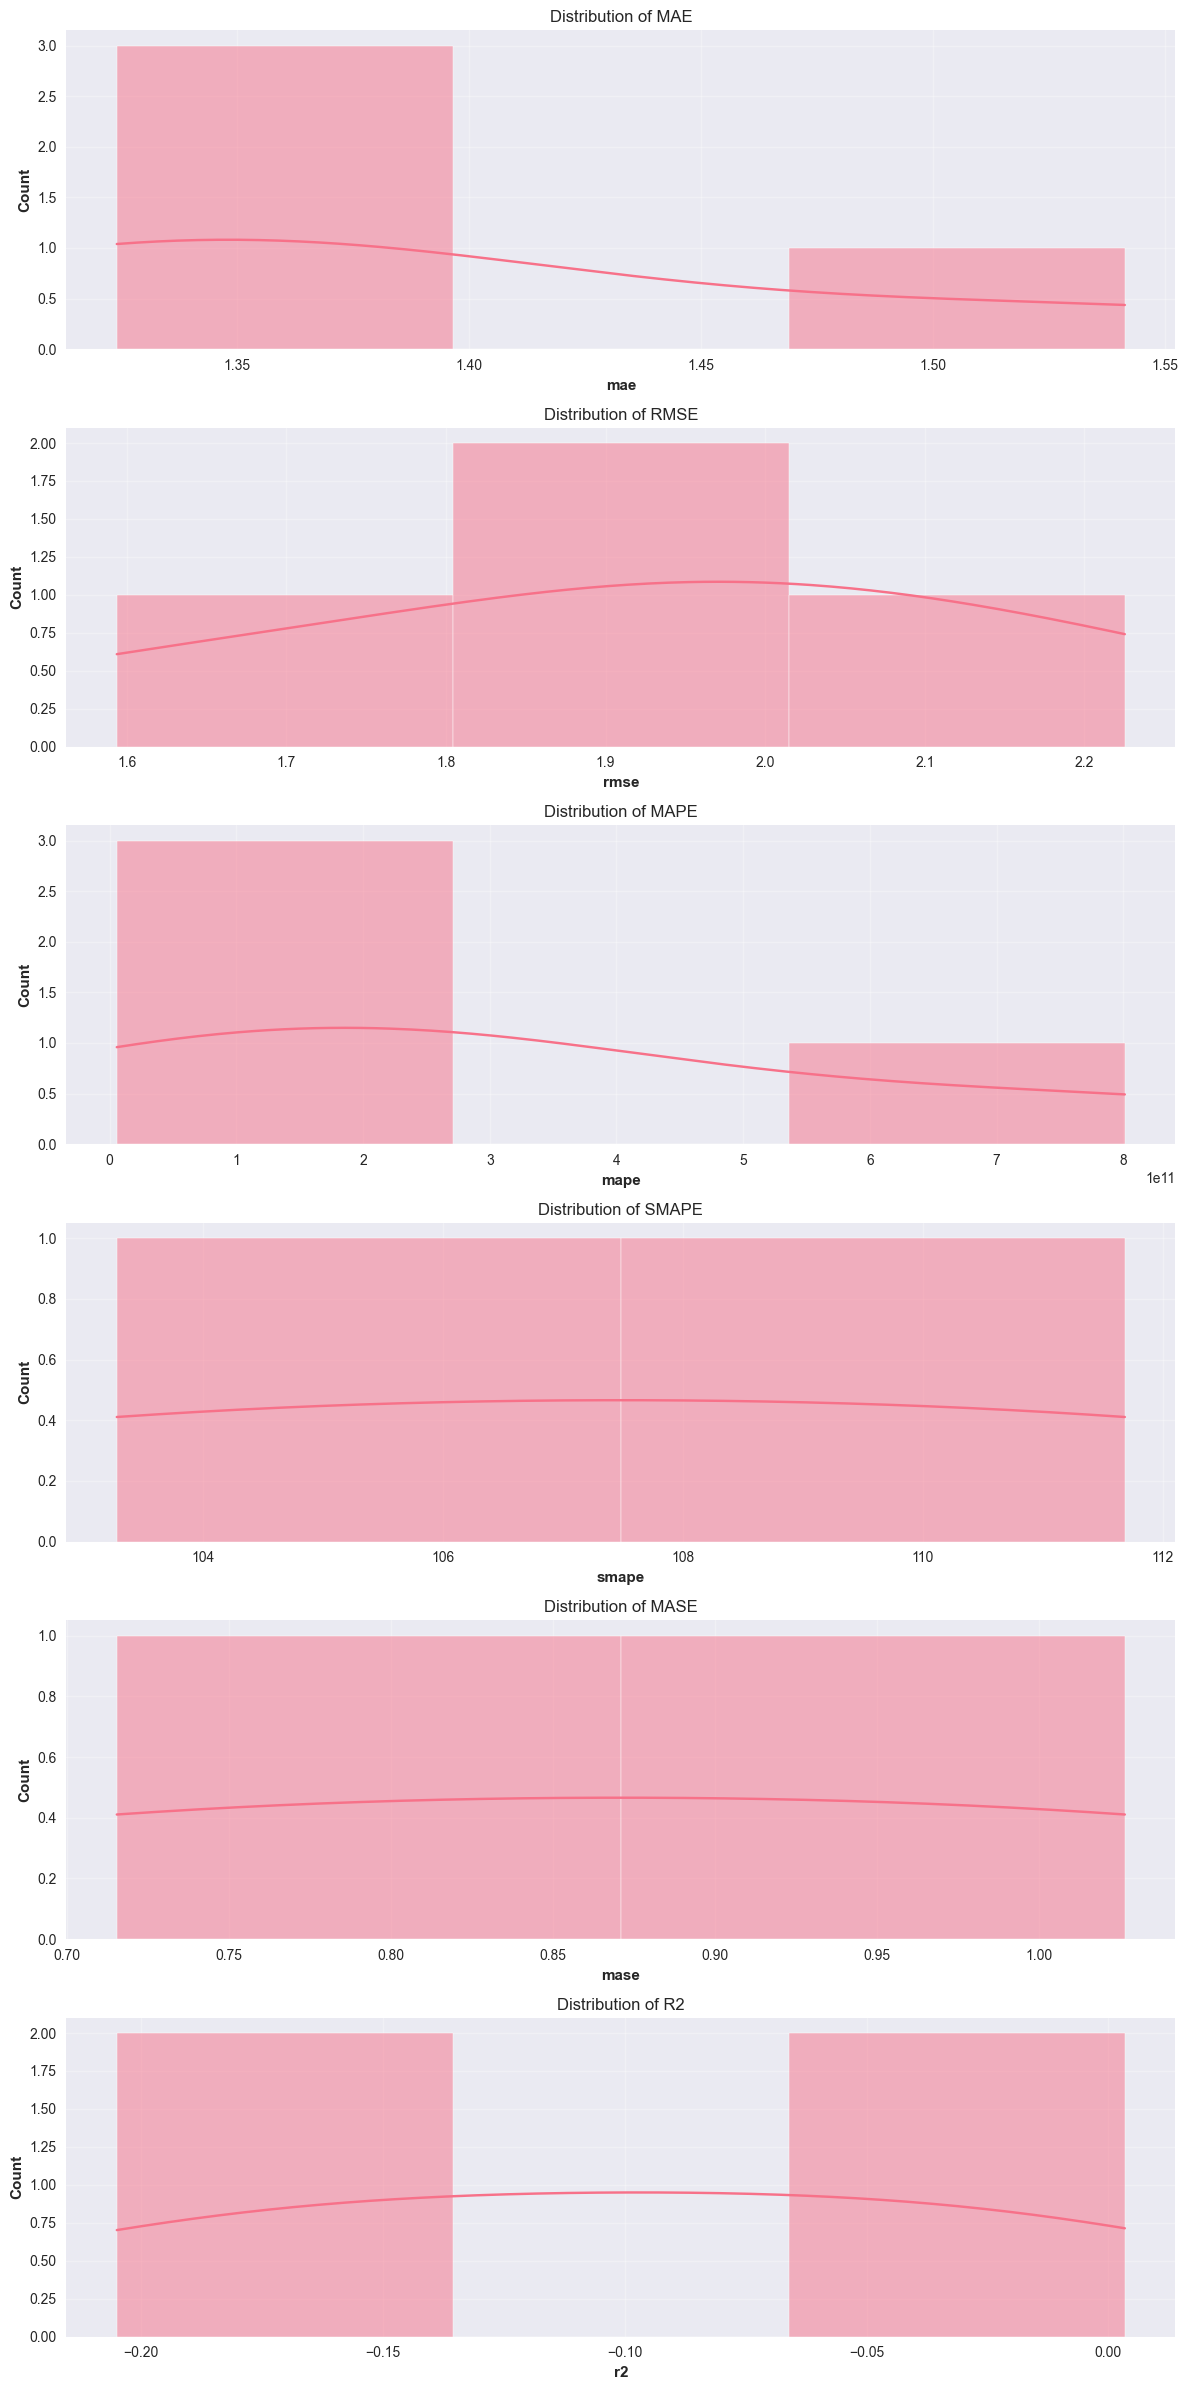

In [18]:
viz.plot_metric_distributions(comparison_df)


#### **10.1.6 Forecast Overlay (only if forecast_data exists)**

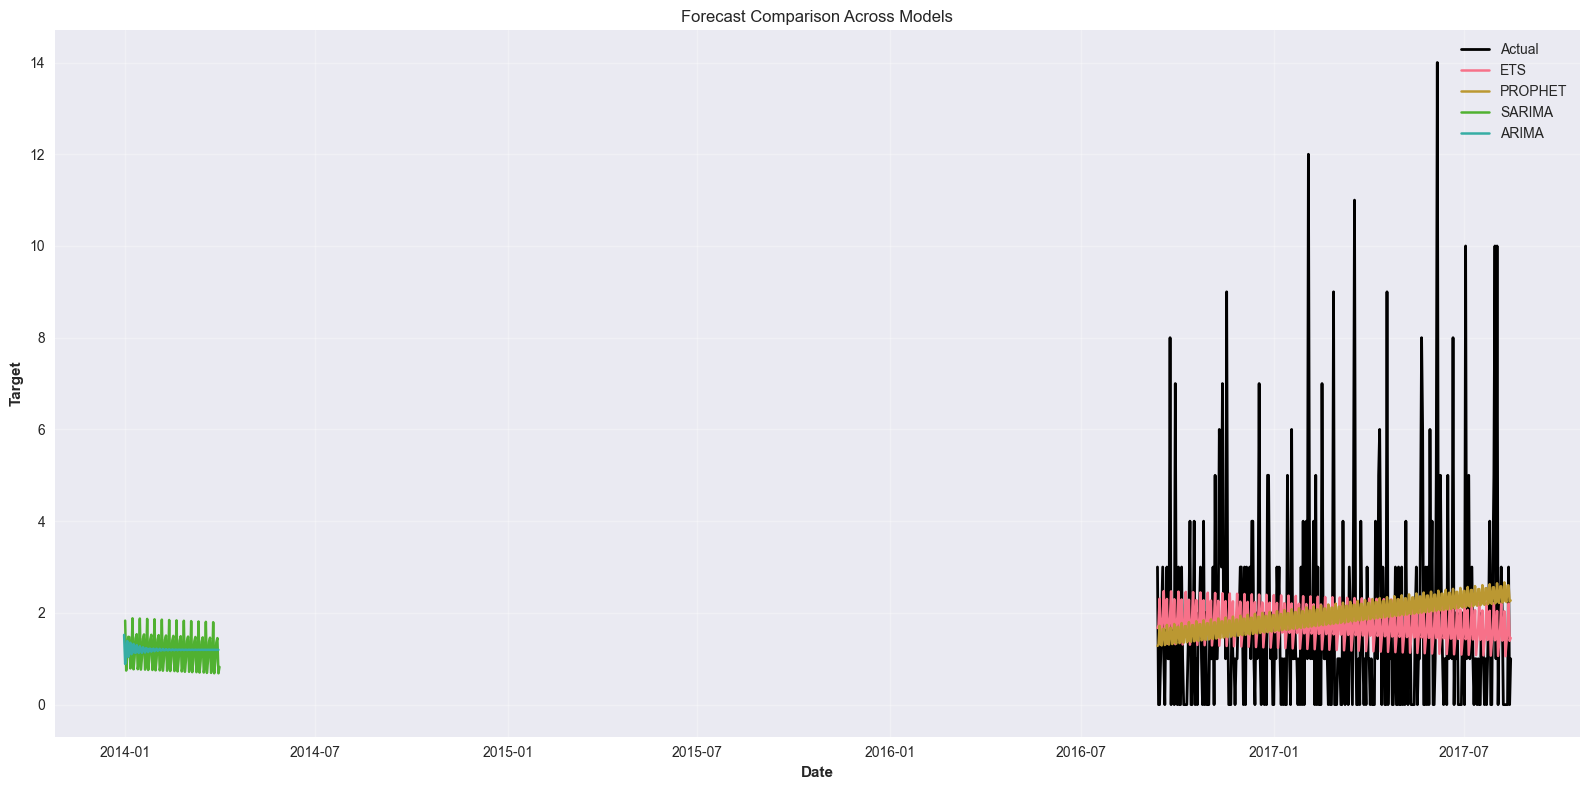

In [19]:
if forecast_data:
    viz.plot_forecast_comparison(forecast_data)


#### **10.1.7 Error Analysis (only if forecast_data exists)**

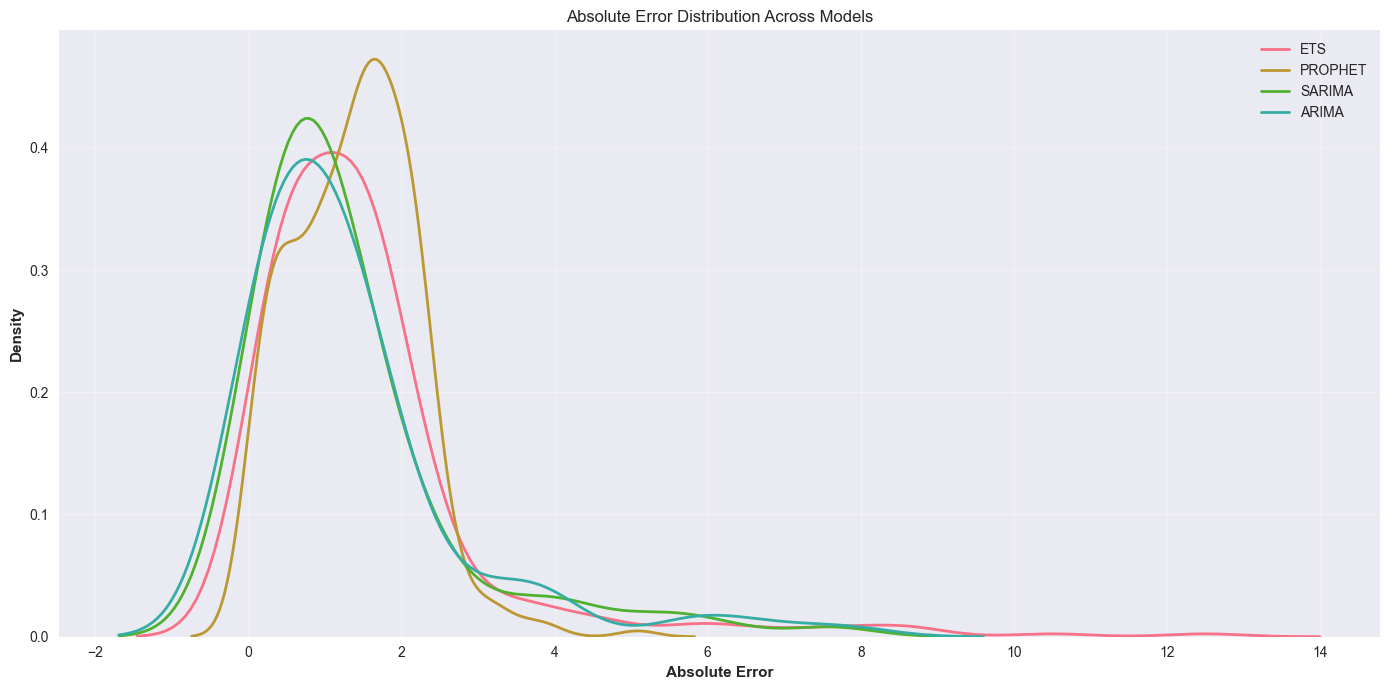

In [20]:
if forecast_data:
    viz.plot_error_analysis(forecast_data)


#### **10.1.8 Statistical Summary**

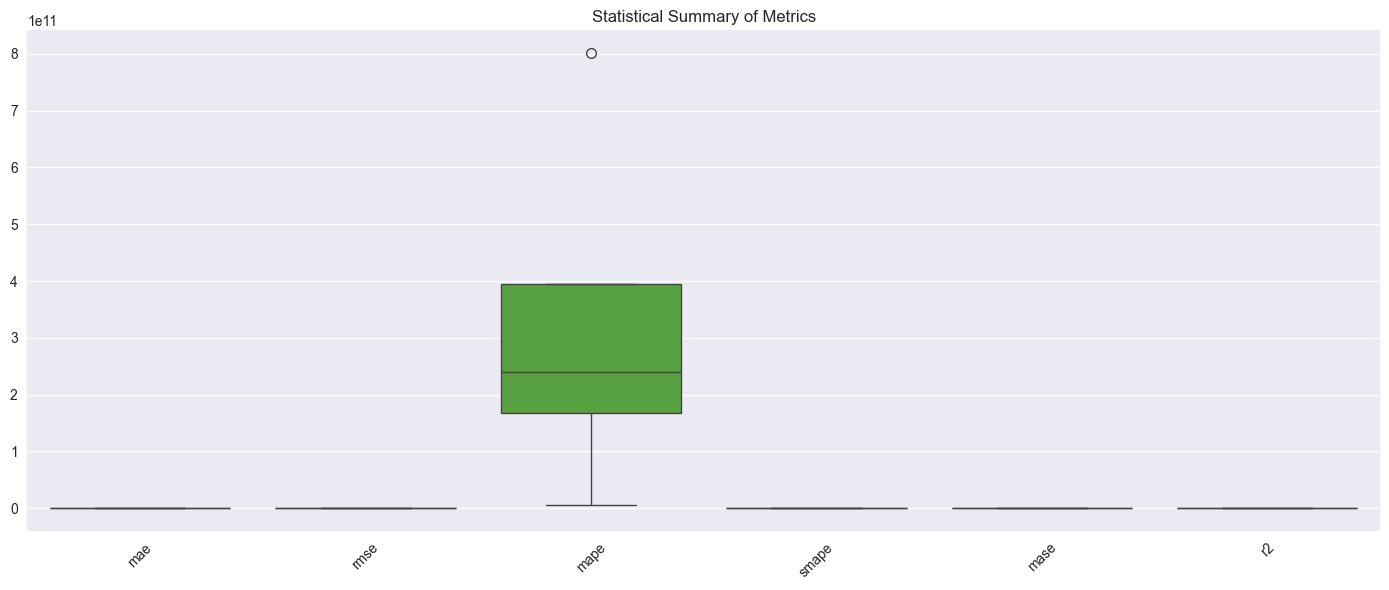

In [21]:
viz.plot_statistical_summary(comparison_df)


### *`10.2 Full vizualiation`*

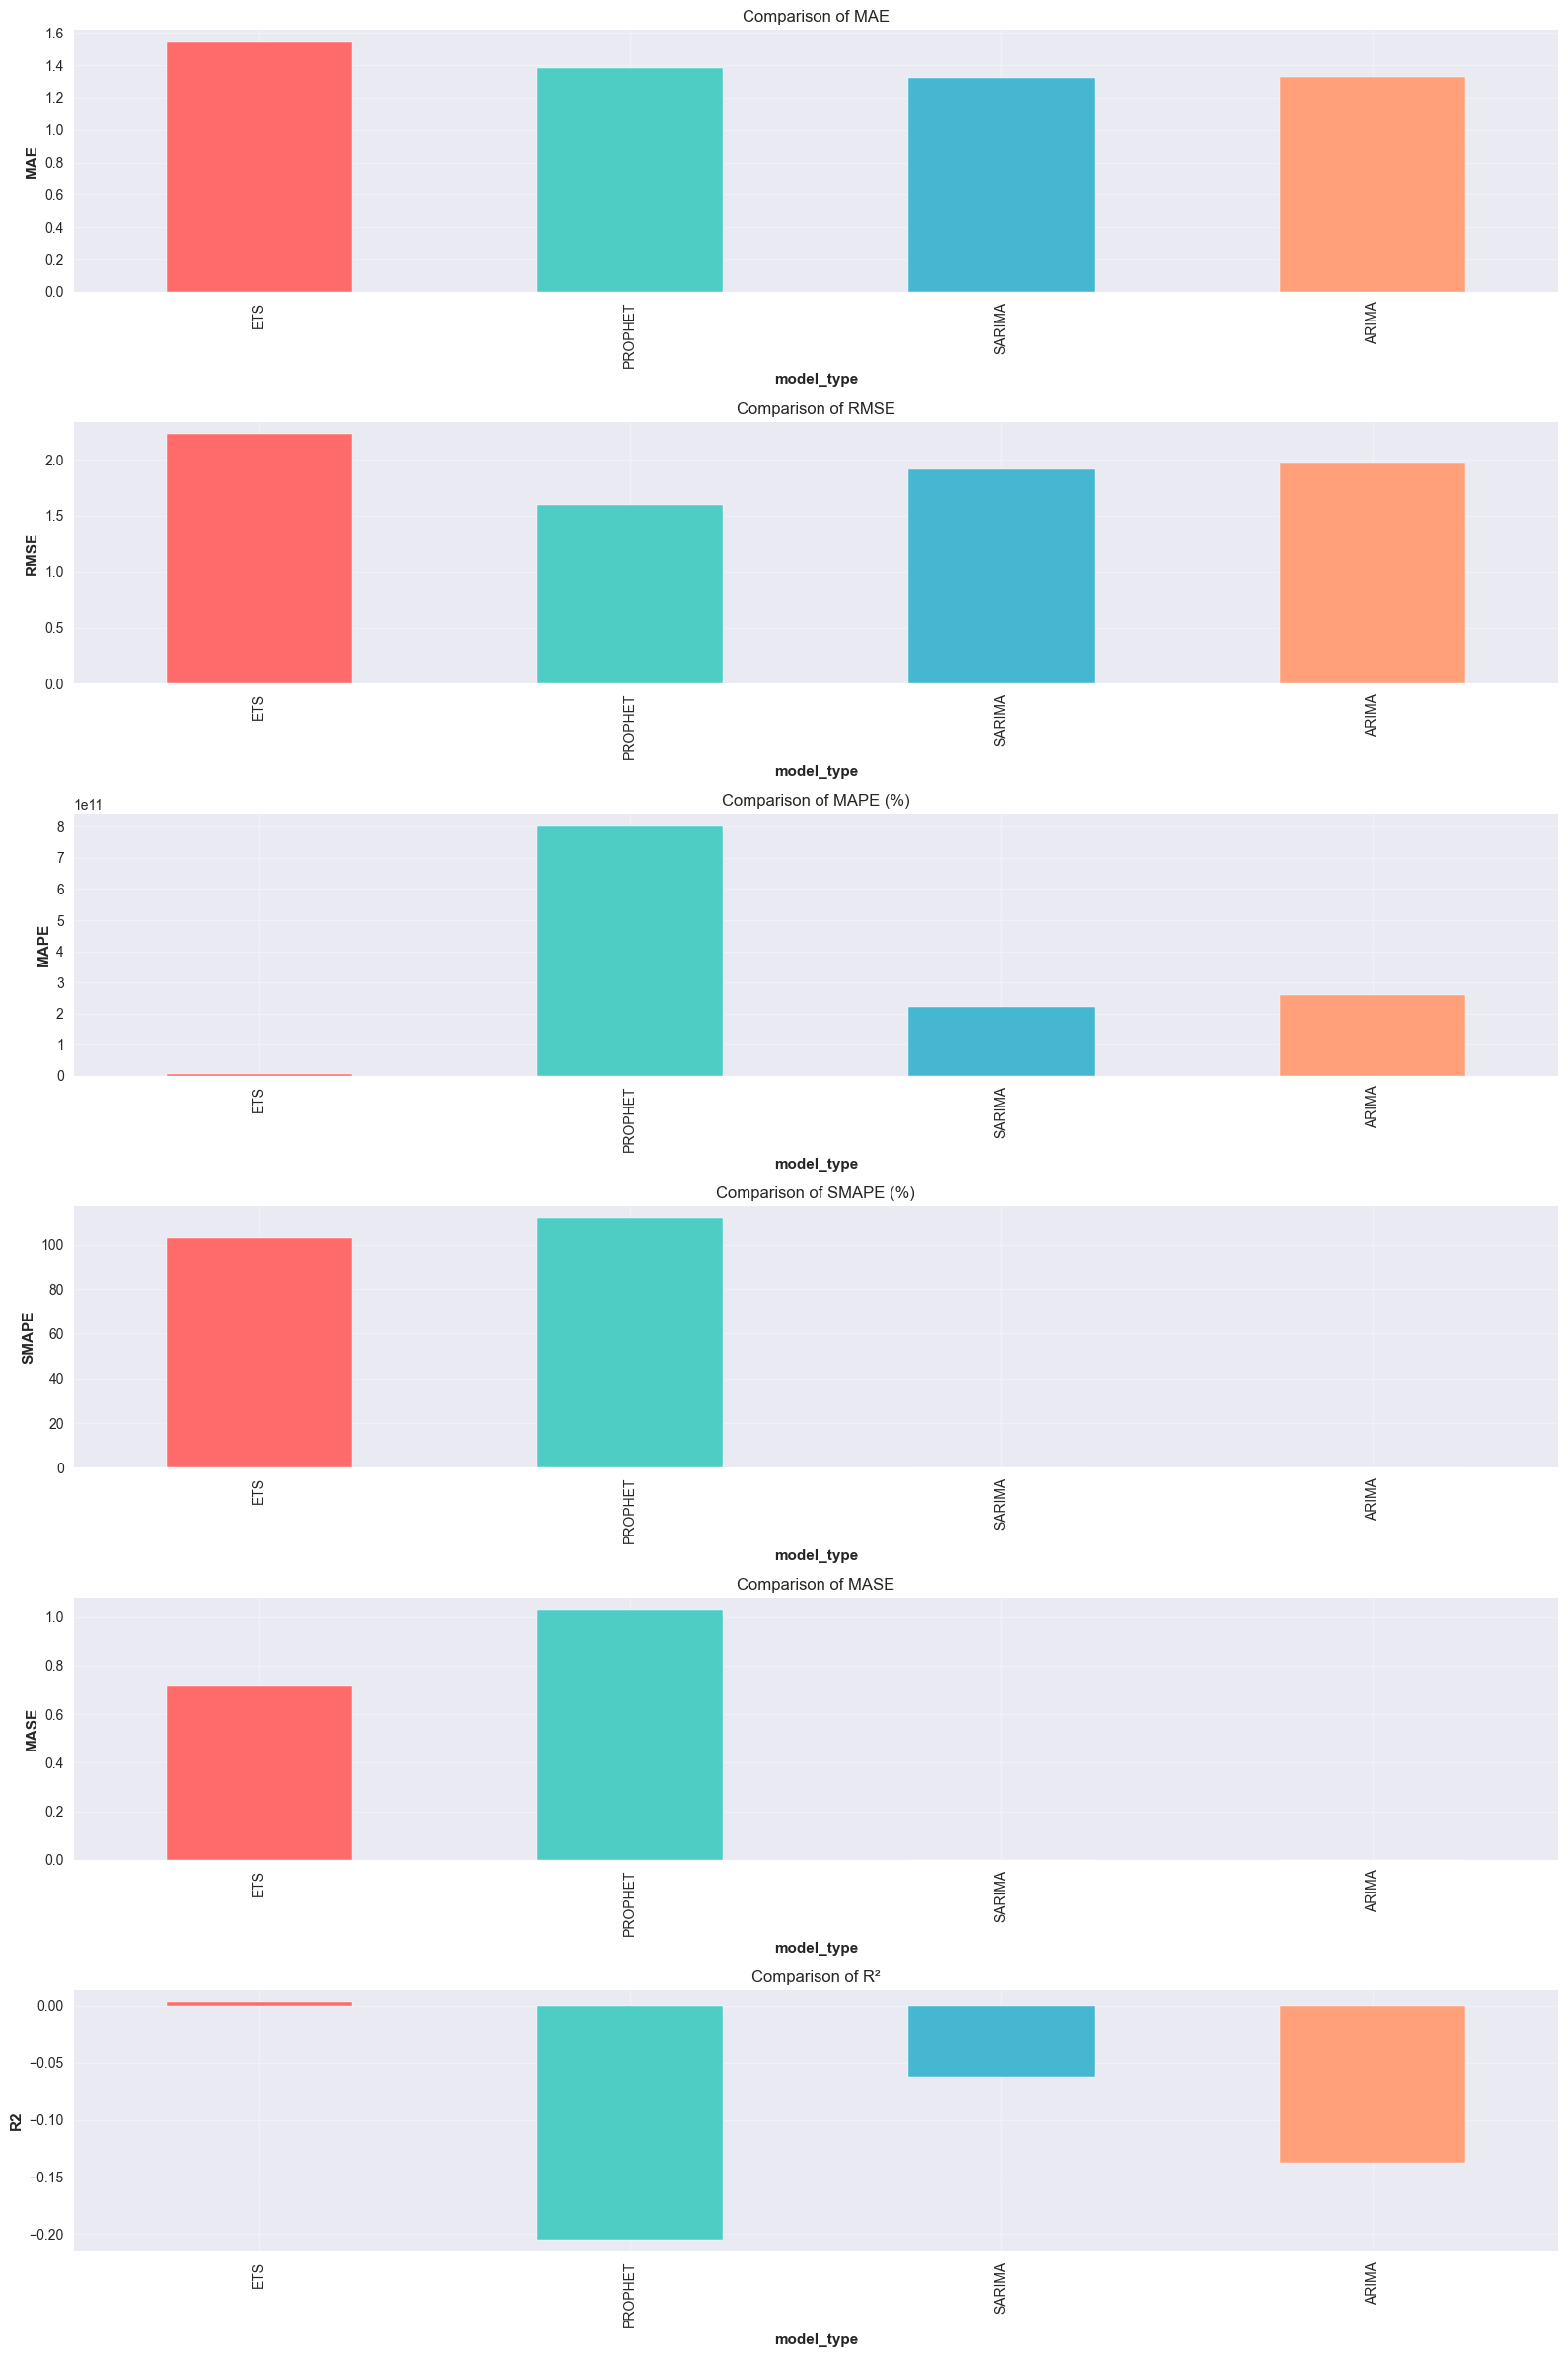

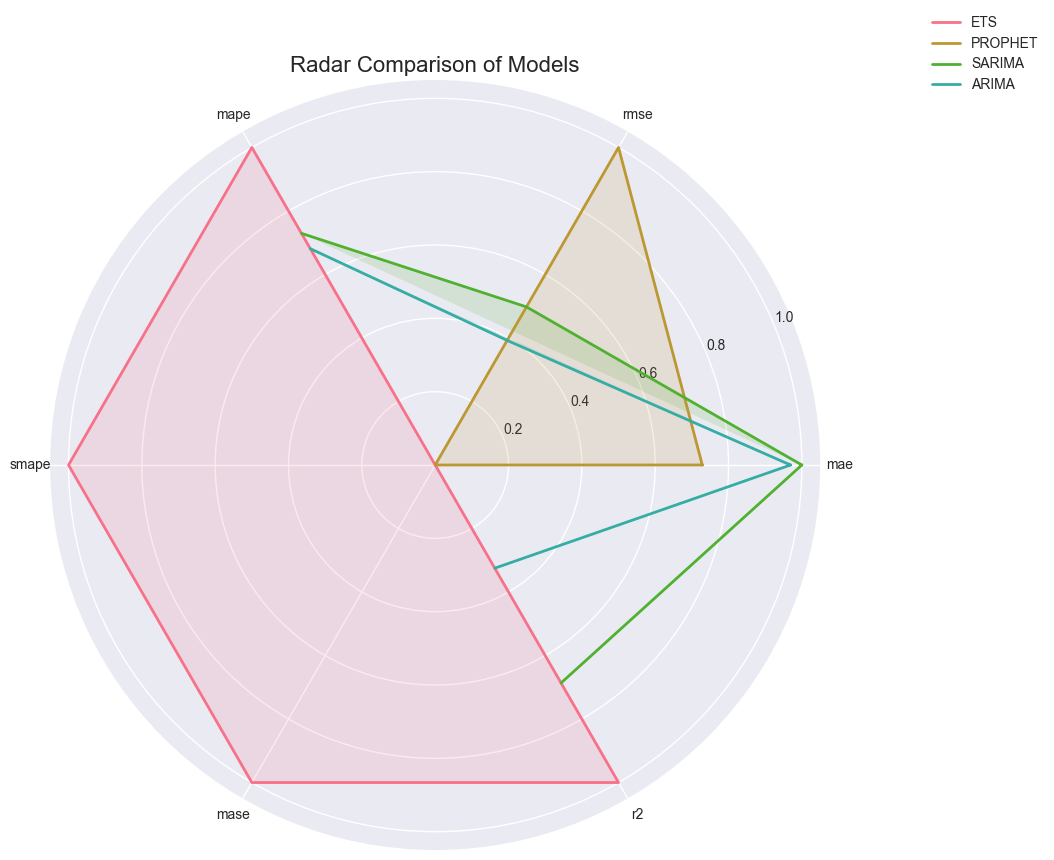

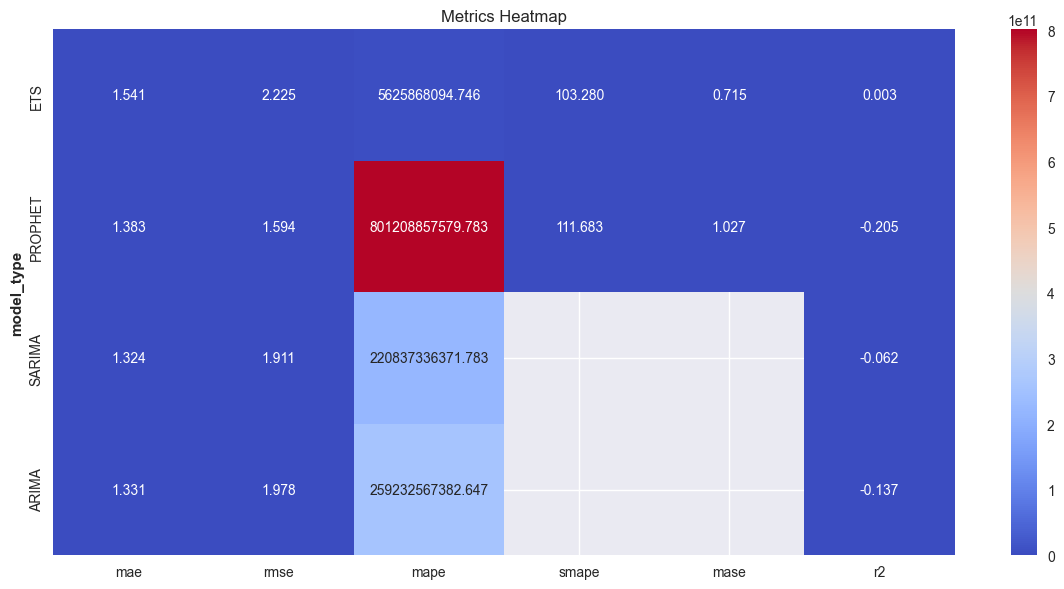

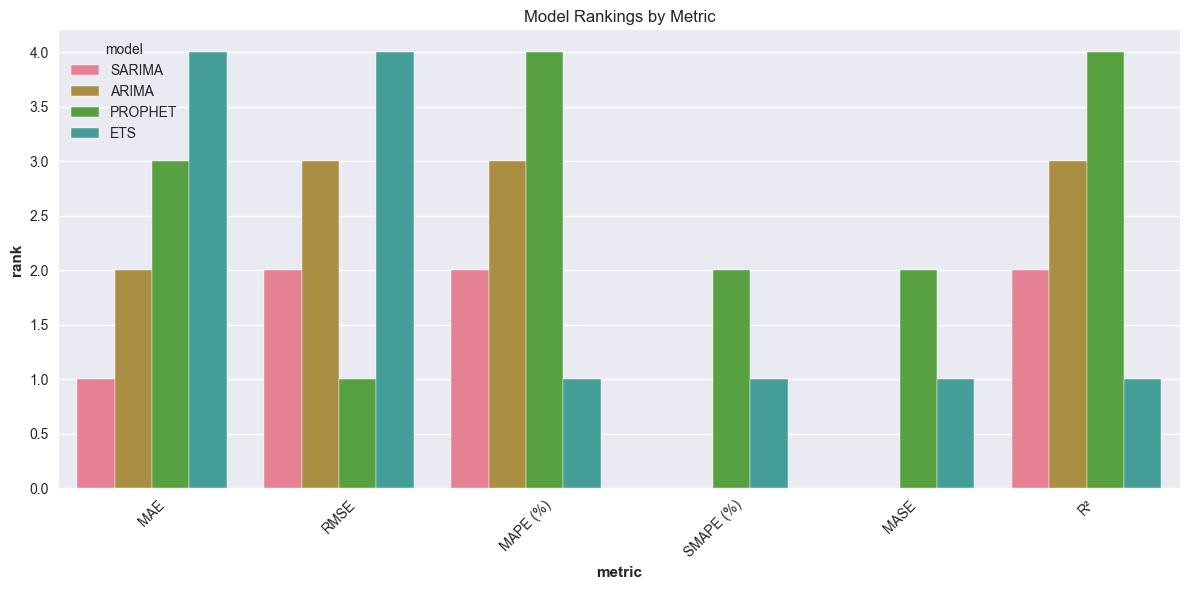

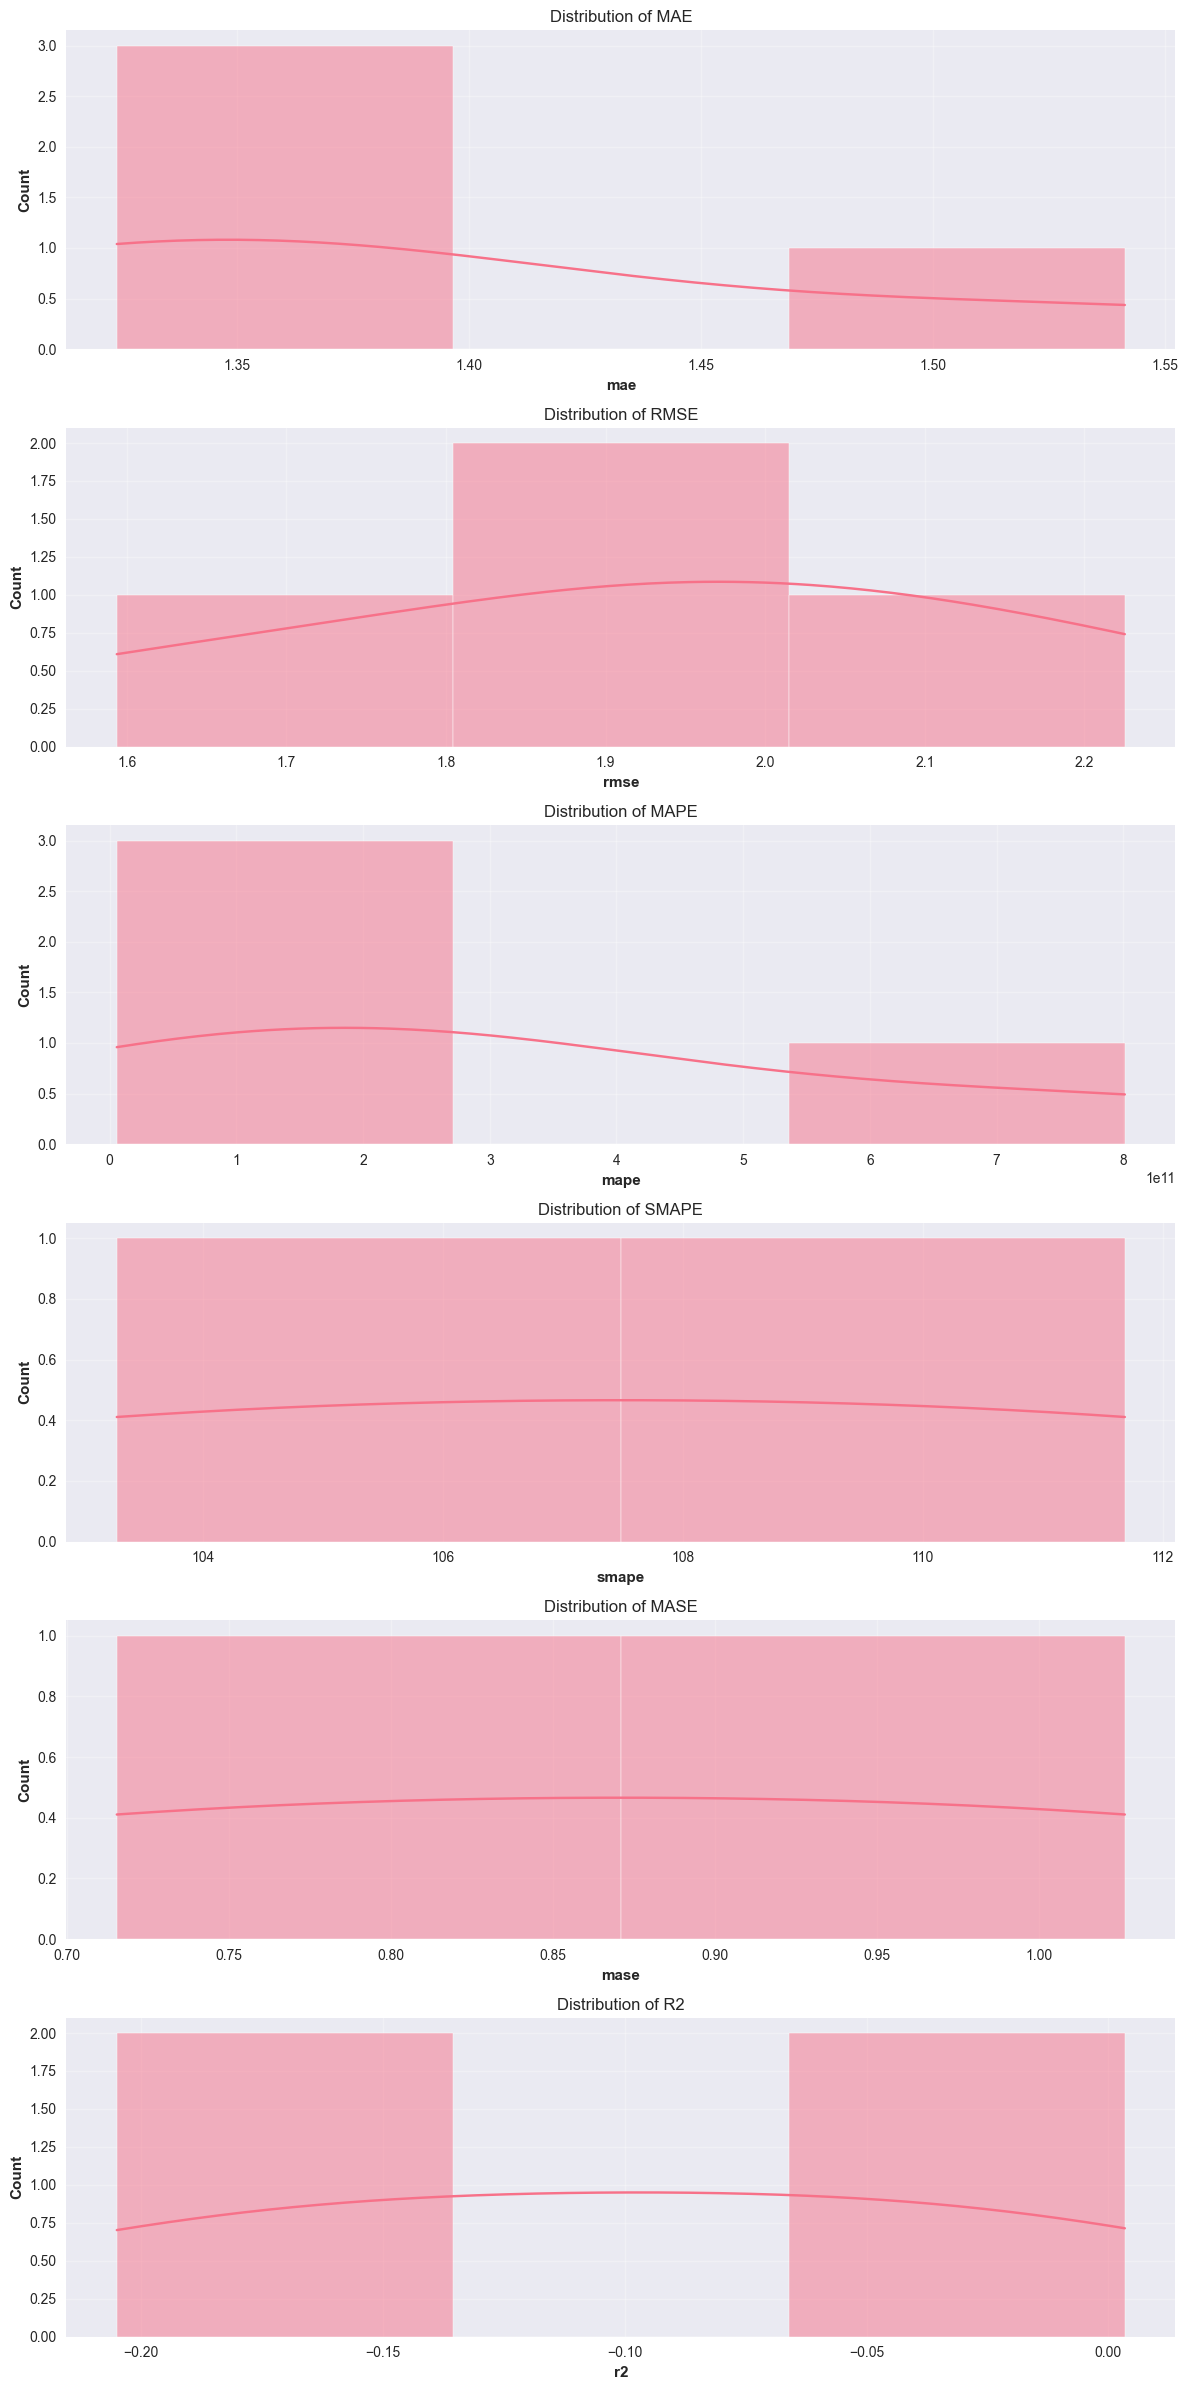

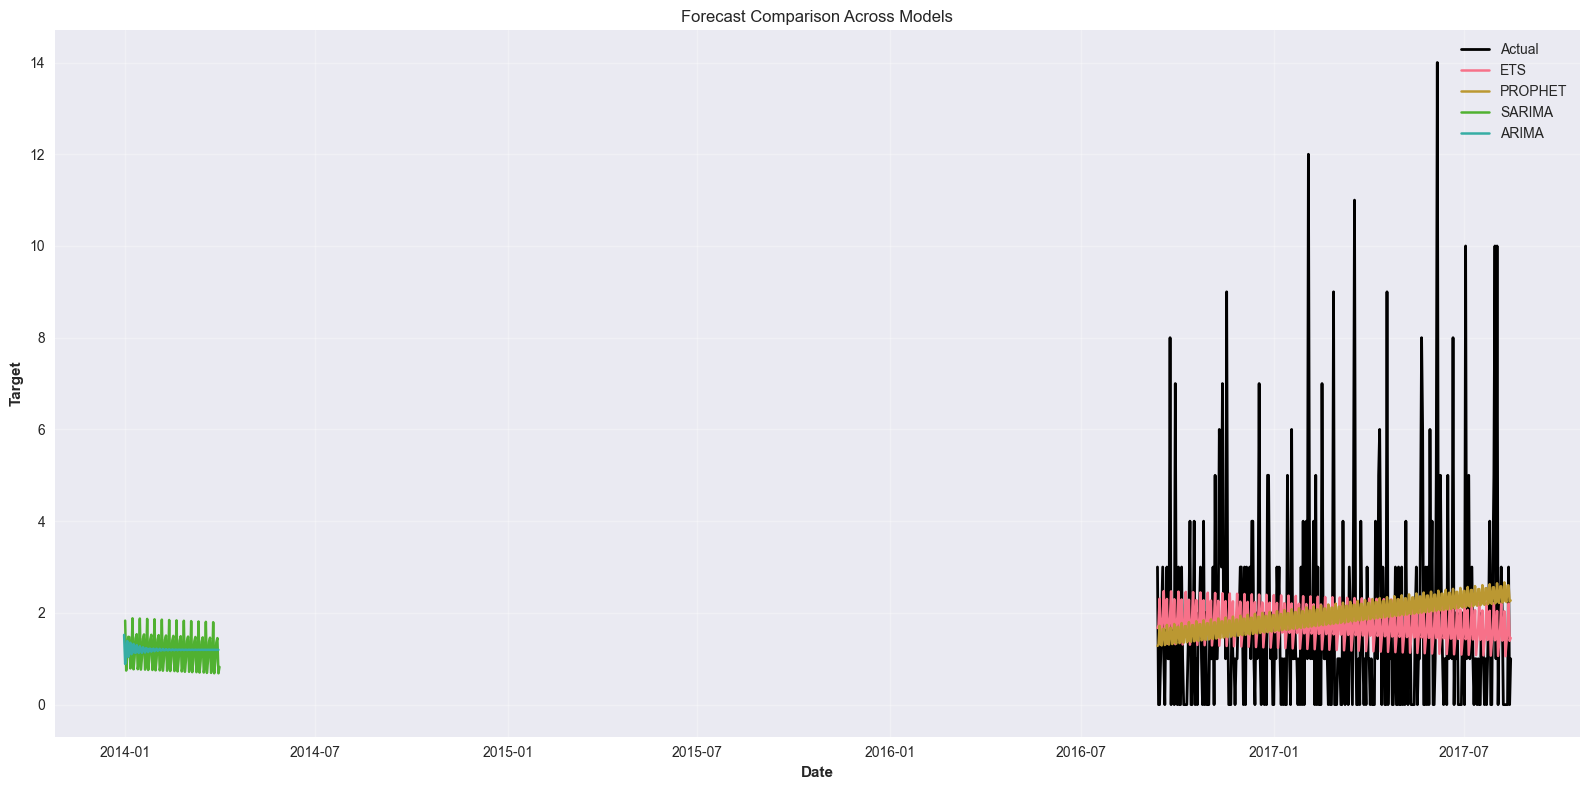

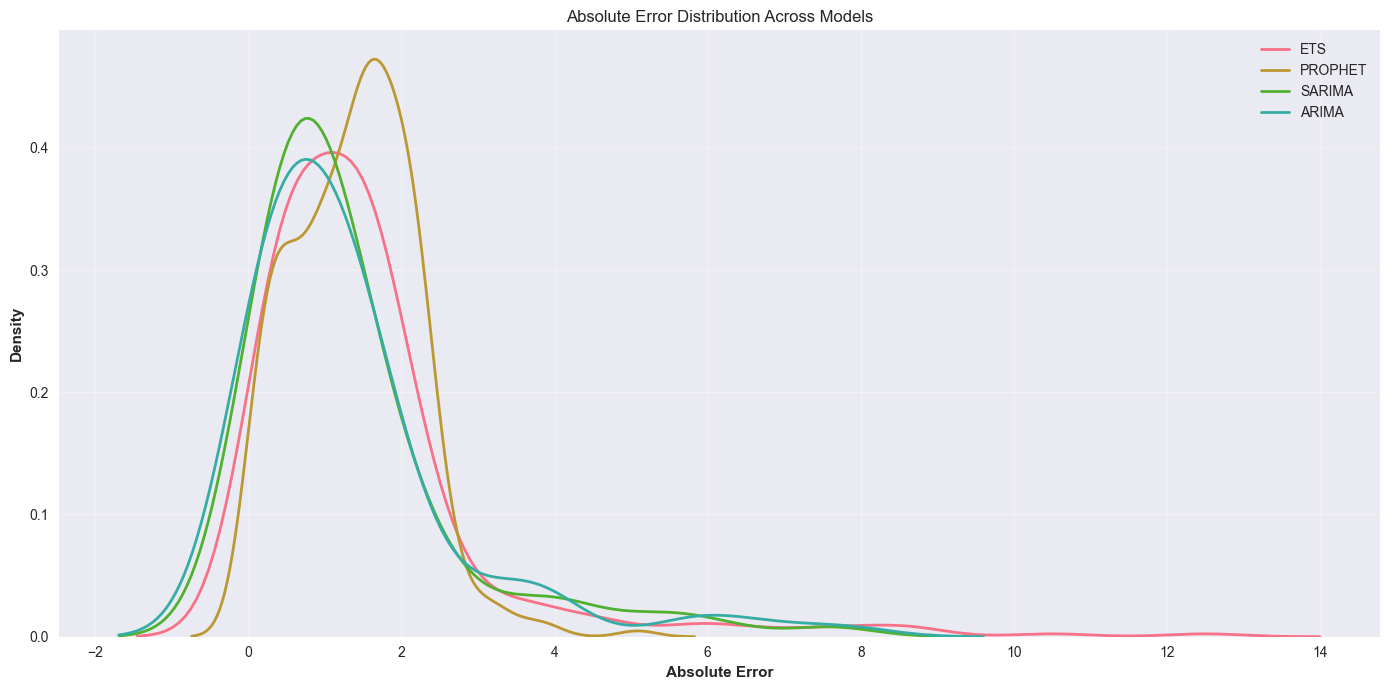

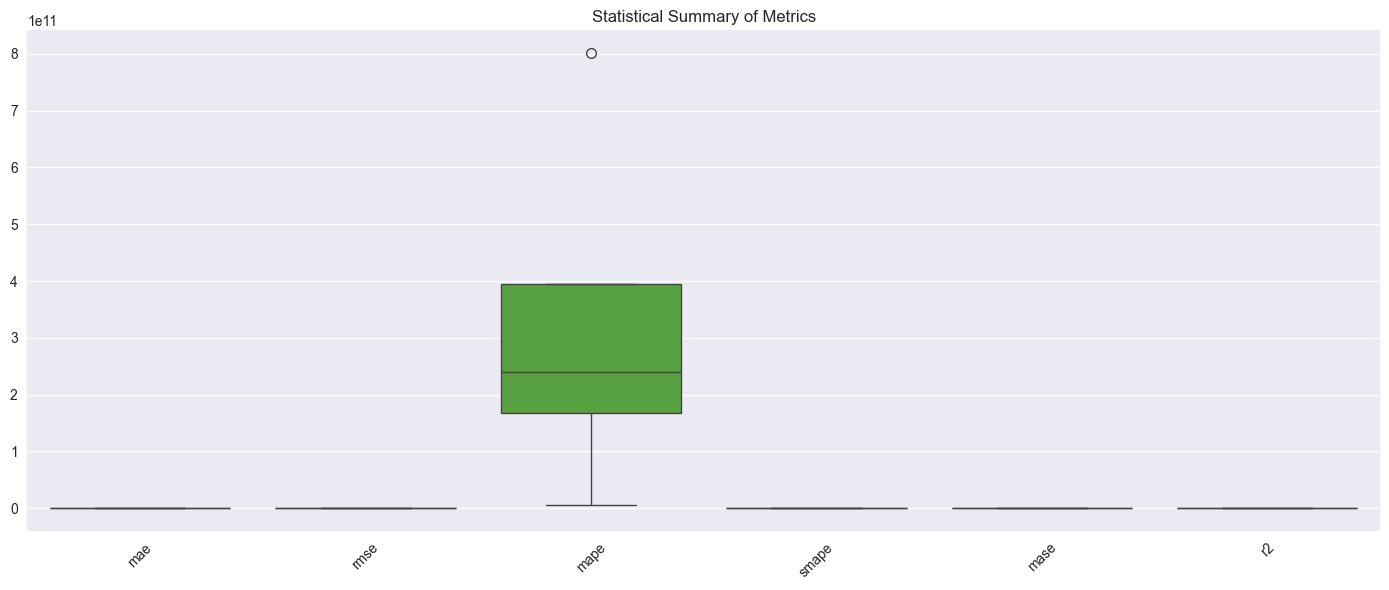

In [22]:
viz.generate_all(
    comparison_df=comparison_df,
    rankings_df=rankings_df,
    forecast_data=forecast_data,
    include_forecast=True,
    include_residuals=True
)


## 1️⃣1️⃣ Save Comparison Results

Saves:
- comparison_table.json
- comparison_table.csv
- model_rankings.csv
- MLflow logging (optional)


In [23]:
comparison.save_results(format="both")



────────────────────────────────────────────────────────────────────────────────
▶ Saving Results
────────────────────────────────────────────────────────────────────────────────
💾 JSON results saved to: /Users/guykaptue/my_work_spaces/machine learning/masterschool/time-series/retail_demand_analysis/reports/results/week_2/comparison/model_comparison_results.json
💾 CSV saved to: /Users/guykaptue/my_work_spaces/machine learning/masterschool/time-series/retail_demand_analysis/reports/results/week_2/comparison/comparison_table.csv
💾 Rankings saved to: /Users/guykaptue/my_work_spaces/machine learning/masterschool/time-series/retail_demand_analysis/reports/results/week_2/comparison/model_rankings.csv

✅ Results saved successfully


## 1️⃣2️⃣ Summary Report

High-level overview of:
- Best model per metric
- Overall performance insights


In [24]:
comparison.show_summary()



MODEL COMPARISON SUMMARY

📊 OVERALL PERFORMANCE:
----------------------------------------
ETS       : Average Score = 0.667
PROPHET   : Average Score = 0.288
SARIMA    : Average Score = 0.728
ARIMA     : Average Score = 0.592

🏆 BEST MODELS BY METRIC:
----------------------------------------

🎯 Best model by MAE:
   Model: SARIMA
   Value: 1.3241
MAE         : SARIMA     (1.3241)

🎯 Best model by RMSE:
   Model: PROPHET
   Value: 1.5938
RMSE        : PROPHET    (1.5938)

🎯 Best model by MAPE (%):
   Model: ETS
   Value: 5625868094.7460
MAPE (%)    : ETS        (5625868094.7460)

🎯 Best model by MASE:
   Model: ETS
   Value: 0.7155
MASE        : ETS        (0.7155)

🎯 Best model by R²:
   Model: ETS
   Value: 0.0034
R²          : ETS        (0.0034)

📈 DATA SUMMARY:
----------------------------------------
Models compared: ETS, PROPHET, SARIMA, ARIMA
Forecast data loaded: 4 model(s)

💡 RECOMMENDATIONS:
----------------------------------------

🎯 Best model by MAPE (%):
   Model: ETS
  

## 1️⃣3️⃣ Direct Model Comparison

Compare two models side-by-side across selected metrics.


### *`13.1 Prophet vs  SARIMA`*

In [25]:
comparison.compare_models("prophet", "sarima")



DIRECT COMPARISON: PROPHET vs SARIMA

  metric           PROPHET            SARIMA         difference pct_diff  winner
     MAE            1.3831            1.3241            -0.0590   -4.27%  SARIMA
    RMSE            1.5938            1.9109            +0.3171  +19.90% PROPHET
MAPE (%) 801208857579.7830 220837336371.7826 -580371521208.0004  -72.44%  SARIMA
      R²           -0.2050           -0.0620            +0.1431  -69.78%  SARIMA


,metric,PROPHET,SARIMA,difference,pct_diff,winner
0,MAE,1.3831,1.3241,-0.0590,-4.27%,SARIMA
1,RMSE,1.5938,1.9109,+0.3171,+19.90%,PROPHET
2,MAPE (%),801208857579.7830,220837336371.7826,-580371521208.0004,-72.44%,SARIMA
3,R²,-0.2050,-0.0620,+0.1431,-69.78%,SARIMA


### *`Quick Compare (One-Call Workflow)`*

Runs:
- Load metrics
- Build table
- Rankings
- Load forecasts
- Save results
- Summary


In [26]:
comparison.quick_compare()



────────────────────────────────────────────────────────────────────────────────
▶ Loading Model Metrics
────────────────────────────────────────────────────────────────────────────────
  ✓ Found: evaluation_metrics.json
✅ Loaded metrics for ETS
  ✓ Found: evaluation_metrics.json
✅ Loaded metrics for PROPHET
  ✓ Found: evaluation_metrics.json
✅ Loaded metrics for SARIMA
  ✓ Found: evaluation_metrics.json
✅ Loaded metrics for ARIMA

✅ Successfully loaded 4 model(s): ETS, PROPHET, SARIMA, ARIMA

────────────────────────────────────────────────────────────────────────────────
▶ Building Comparison Table
────────────────────────────────────────────────────────────────────────────────
✅ Built comparison table with 4 models

✅ Comparison table built with 4 models

Comparison Table:
model_type      mae     rmse         mape      smape     mase        r2         aic  coverage train_size test_size      mse    rmsle   adj_r2      mdape     wape    rmsse        rae      rse      mfe           mp

2026/01/15 14:43:16 INFO mlflow.store.db.utils: Creating initial MLflow database tables...
2026/01/15 14:43:16 INFO mlflow.store.db.utils: Updating database tables
2026/01/15 14:43:16 INFO alembic.runtime.migration: Context impl SQLiteImpl.
2026/01/15 14:43:16 INFO alembic.runtime.migration: Will assume non-transactional DDL.
2026/01/15 14:43:16 INFO alembic.runtime.migration: Context impl SQLiteImpl.
2026/01/15 14:43:16 INFO alembic.runtime.migration: Will assume non-transactional DDL.


📊 Metrics logged to MLflow under experiment 'COMPARISON'.
💾 MLflow metrics also saved locally to: /Users/guykaptue/my_work_spaces/machine learning/masterschool/time-series/retail_demand_analysis/reports/mlflow/mlflow_comparison.json
✅ Results logged to MLflow

MODEL COMPARISON SUMMARY

📊 OVERALL PERFORMANCE:
----------------------------------------
ETS       : Average Score = 0.667
PROPHET   : Average Score = 0.288
SARIMA    : Average Score = 0.728
ARIMA     : Average Score = 0.592

🏆 BEST MODELS BY METRIC:
----------------------------------------

🎯 Best model by MAE:
   Model: SARIMA
   Value: 1.3241
MAE         : SARIMA     (1.3241)

🎯 Best model by RMSE:
   Model: PROPHET
   Value: 1.5938
RMSE        : PROPHET    (1.5938)

🎯 Best model by MAPE (%):
   Model: ETS
   Value: 5625868094.7460
MAPE (%)    : ETS        (5625868094.7460)

🎯 Best model by MASE:
   Model: ETS
   Value: 0.7155
MASE        : ETS        (0.7155)

🎯 Best model by R²:
   Model: ETS
   Value: 0.0034
R²          : 

,model_type,mae,rmse,mape,smape,mase,r2,aic,coverage,train_size,test_size,mse,rmsle,adj_r2,mdape,wape,rmsse,rae,rse,mfe,mpe,tracking_signal,theil_u,interval_width,interval_score,winkler_score,acf1,ljungbox_statistic,ljungbox_pvalue,shapiro_statistic,shapiro_pvalue,jarque_bera_statistic,jarque_bera_pvalue,durbin_watson,residuals_mean,residuals_std,residuals_min,residuals_max,residuals_skewness,residuals_kurtosis,directional_accuracy,pt_statistic,pt_pvalue
0,ETS,1.541363,2.225329,5.625868e+09,103.279959,0.715481,0.003392,NaN,NaN,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,PROPHET,1.383057,1.593793,8.012089e+11,111.682516,1.026630,-0.205024,NaN,97.337278,None,None,2.540176,0.747246,-0.20861,104.512944,108.9681,0.831547,393.275326,1.205024,-0.66654,-8.012089e+11,-0.481933,0.831547,5.662926,6.444461,6.444461,0.163562,30.279923,0.000771,0.910399,2.750994e-13,67.792549,1.901232e-15,1.379774,-0.66654,1.447722,-2.66529,5.084965,1.041346,0.689976,37.982196,-4.412351,0.00001
2,SARIMA,1.324057,1.910897,2.208373e+11,NaN,NaN,-0.061961,0.000000,NaN,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ARIMA,1.330780,1.977513,2.592326e+11,NaN,NaN,-0.137294,1408.561489,NaN,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
comparison.display_interactive_summary()

HTML(value='\n        <div style="background: linear-gradient(135deg, #f8f9fa 0%, #ffffff 100%);\n            …